# Neurotorch Signal Amplifing Algorithm

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from ipywidgets import interact, Button
import ipywidgets as widgets
import scipy.ndimage as ndimage
from scipy.optimize import curve_fit
from matplotlib.patches import Circle
import xarray
import scipy as sp

In [4]:
sys.path.insert(1, os.path.join(os.path.join(os.path.abspath(""), os.pardir), os.pardir))
import neurotorch as neuro
neuro.Start_Background()
%matplotlib inline

In [6]:
import neurotorch.utils.synapse_detection as synapse_detection

In [9]:
roiOfInterest = None
for s in neuro.API.GUI().tab3.detectionResult.synapses:
    s : synapse_detection.SingleframeSynapse = s
    roi = s.synapse
    if (roi.location == (441, 357)):
        roiOfInterest = roi
        print(roi.location)

(441, 357)


(115, 450)


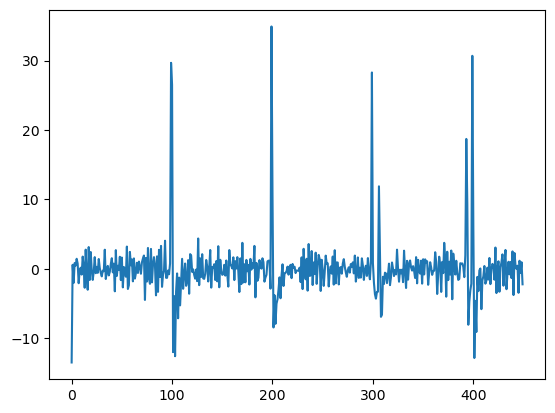

In [46]:
diffSignal = roiOfInterest.GetImageDiffSignal(neuro.API.GUI_IMGObj())
print(diffSignal.shape)
plt.plot(np.mean(diffSignal, axis=0))
plt.show()

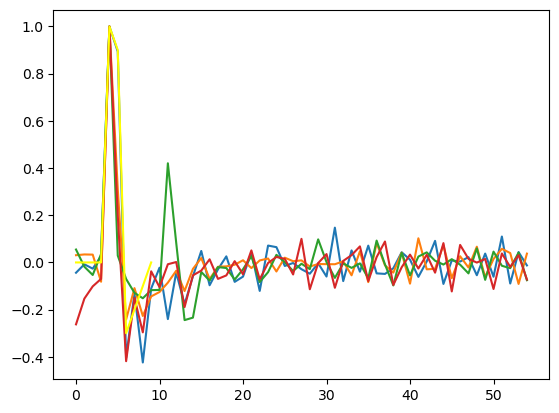

In [54]:
%matplotlib inline
plt.plot(np.mean(diffSignal, axis=0)[95:150]/np.max(np.mean(diffSignal, axis=0)[95:150]))
plt.plot(np.mean(diffSignal, axis=0)[195:250]/np.max(np.mean(diffSignal, axis=0)[195:250]))
plt.plot(np.mean(diffSignal, axis=0)[295:350]/np.max(np.mean(diffSignal, axis=0)[295:350]))
plt.plot(np.mean(diffSignal, axis=0)[395:450]/np.max(np.mean(diffSignal, axis=0)[395:450]))
plt.plot([0,0,0,0,1,0.9,-0.3,-0.2,-0.1,0], c="yellow")
plt.show()

(450,) 1
(447,) (450,)


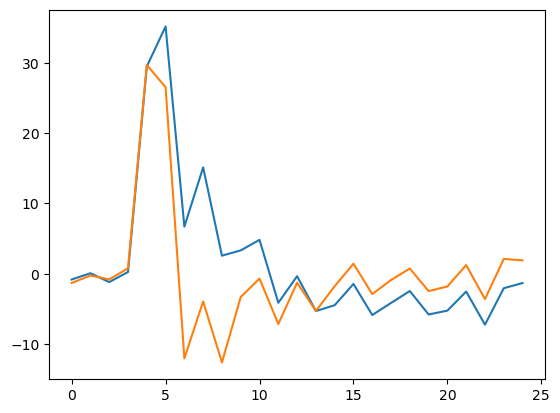

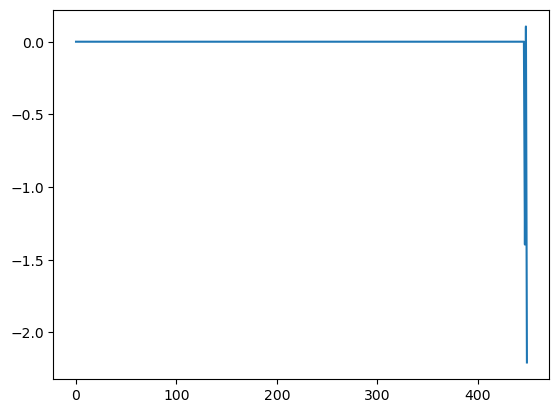

In [57]:
from scipy.signal import deconvolve
meanDiff = np.mean(diffSignal, axis=0)
print(meanDiff.shape, len(meanDiff.shape))
deconvMeanDiff, remainder = deconvolve(meanDiff, np.array([1,-0.3,-0.275,-0.25]))
print(deconvMeanDiff.shape, remainder.shape)
plt.plot(deconvMeanDiff[95:120])
plt.plot(meanDiff[95:120])
plt.show()
plt.plot(remainder)
plt.show()

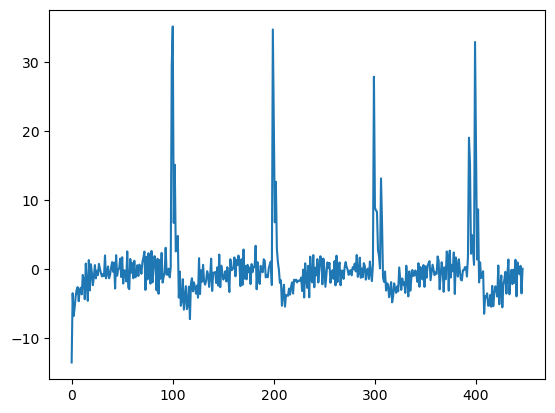

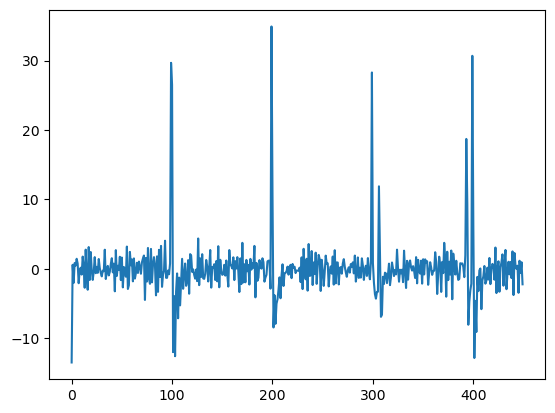

In [70]:
diffDSignal = np.empty((diffSignal.shape[0], diffSignal.shape[1]-3))
for i in range(diffSignal.shape[0]):
    d, remainder = deconvolve(diffSignal[i], np.array([1,-0.3,-0.275,-0.25]))
    diffDSignal[i,:] = d
diffDMean = np.mean(diffDSignal, axis=0)
plt.plot(diffDMean)
plt.show()
plt.plot(meanDiff)
plt.show()